In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

In [2]:
cd C:\Users\PoisonTree\Documents\marketeduser

C:\Users\PoisonTree\Documents\Uptake


In [3]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 400

In [4]:
training_original = pd.read_csv("training.csv",na_values=["?"]) #Reading the dataset in a dataframe using Pandas

In [5]:
training_original.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2,999,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999,0,no,NaN,1
1,31,services,single,high.school,no,no,no,cellular,jul,thu,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999,0,no,NaN,2
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999,0,no,NaN,3
3,52,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999,0,no,NaN,4
4,39,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999,0,no,NaN,5


In [6]:
np.shape(training_original)

(8238, 24)

In [7]:
testing_original = pd.read_csv("testingCandidate.csv",na_values=["?"]) #Reading the dataset in a dataframe using Pandas

In [8]:
testing_original.head(15)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5
5,NaN,student,single,NaN,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,999.0,0,6
6,36,housemaid,married,basic.4y,no,yes,no,cellular,apr,NaN,7,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,999.0,0,7
7,30,admin.,single,basic.9y,no,yes,no,telephone,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0,8
8,NaN,blue-collar,single,NaN,no,yes,no,telephone,may,wed,10,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,9
9,NaN,self-employed,married,NaN,no,no,no,cellular,aug,fri,7,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,999.0,0,10


In [9]:
np.shape(testing_original)

(32950, 22)

In [10]:
training_original.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
profit            float64
id                  int64
dtype: object

In [11]:
training_original.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,6224,39.953728,10.540516,18.000,32.000,38.000,47.000,94.000
campaign,8238,2.531682,2.709773,1.000,1.000,2.000,3.000,40.000
pdays,8238,960.916606,190.695054,0.000,999.000,999.000,999.000,999.000
previous,8238,0.183054,0.514209,0.000,0.000,0.000,0.000,6.000
emp.var.rate,8238,0.056397,1.566550,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,8238,93.570977,0.578782,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,8238,-40.577907,4.650101,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,8238,3.586929,1.742784,0.634,1.334,4.857,4.961,5.045
nr.employed,8238,5165.575965,72.727423,4963.600,5099.100,5191.000,5228.100,5228.100
pmonths,8238,960.687436,191.841012,0.000,999.000,999.000,999.000,999.000


### Fill In missing values with column means. If missing values in a column contain more than 50% missing then remove

In [12]:
percent_missing=training_original.ix[:,0].isnull().sum()
total=8238

In [13]:
(percent_missing/total)*100

24.447681476086426

In [14]:
((training_original.ix[:,15].isnull().sum())/8238)*100 #CHANGE THIS 100 according to length of observations, (1/10000*100)=100

0.0

In [15]:
remove_column=[]
fillin_column=[]
for i in range(training_original.shape[1]):
    percent_missing = ((training_original.ix[:,i].isnull().sum())/8238)*100
    print(i, percent_missing, "% of the data column is missing")
    if percent_missing >= 50:
        remove_column.append(i)
    elif 0 < percent_missing < 50 :
        fillin_column.append(i)


0 24.4476814761 % of the data column is missing
1 0.0 % of the data column is missing
2 0.0 % of the data column is missing
3 29.2061179898 % of the data column is missing
4 0.0 % of the data column is missing
5 0.0 % of the data column is missing
6 0.0 % of the data column is missing
7 0.0 % of the data column is missing
8 0.0 % of the data column is missing
9 9.55328963341 % of the data column is missing
10 0.0 % of the data column is missing
11 0.0 % of the data column is missing
12 0.0 % of the data column is missing
13 0.0 % of the data column is missing
14 0.0 % of the data column is missing
15 0.0 % of the data column is missing
16 0.0 % of the data column is missing
17 0.0 % of the data column is missing
18 0.0 % of the data column is missing
19 0.0 % of the data column is missing
20 0.0 % of the data column is missing
21 0.0 % of the data column is missing
22 88.7351298859 % of the data column is missing
23 0.0 % of the data column is missing


In [16]:
#FOR TESTING_ORIGINAL
remove_column_TESTING=[]
fillin_column_TESTING=[]
for i in range(testing_original.shape[1]):
    percent_missing = ((testing_original.ix[:,i].isnull().sum())/32950)*100
    print(i, percent_missing, "% of the data column is missing")
    if percent_missing >= 50:
        remove_column_TESTING.append(i)
    elif 0 < percent_missing < 50 :
        fillin_column_TESTING.append(i)


0 24.406676783 % of the data column is missing
1 0.0 % of the data column is missing
2 0.0 % of the data column is missing
3 29.6509863429 % of the data column is missing
4 0.0 % of the data column is missing
5 0.0 % of the data column is missing
6 0.0 % of the data column is missing
7 0.0 % of the data column is missing
8 0.0 % of the data column is missing
9 10.1001517451 % of the data column is missing
10 0.0 % of the data column is missing
11 0.0 % of the data column is missing
12 0.0 % of the data column is missing
13 0.0 % of the data column is missing
14 0.0 % of the data column is missing
15 0.0 % of the data column is missing
16 0.0 % of the data column is missing
17 0.0 % of the data column is missing
18 0.0 % of the data column is missing
19 0.0 % of the data column is missing
20 0.0 % of the data column is missing
21 0.0 % of the data column is missing


In [17]:
print("remove column",remove_column_TESTING)
print("fill-in column",fillin_column_TESTING)

remove column []
fill-in column [0, 3, 9]


In [18]:
print("remove column",remove_column)
print("fill-in column",fillin_column)

remove column [22]
fill-in column [0, 3, 9]


In [19]:
training_original.iloc[:, [22]].head(2)  #Look up the column name by the index
#It it the 'profit' column which is a target variable so it won't be removed.
#The columns to fill are: age, schooling, day of week, age is the only int. Fill in categorical variables with mode.

,profit
0,NaN
1,NaN


In [20]:
mean_0=training_original.ix[:,0].mean()
mean_0.round()

40.0

In [21]:
mean_0_testing=testing_original.ix[:,0].mean()
mean_0_testing.round()

40.0

In [22]:
mode_3_testing=testing_original.ix[:,3].mode()
mode_9_testing=testing_original.ix[:,9].mode()
print("mode_3_testing",mode_3_testing)
print("mode_9_testing",mode_9_testing)

mode_3_testing 0    university.degree
dtype: object
mode_9_testing 0    thu
dtype: object


In [23]:
mode_3=training_original.ix[:,3].mode()
mode_9=training_original.ix[:,9].mode()

In [24]:
mode_3

0    university.degree
dtype: object

In [25]:
mode_9

0    mon
dtype: object

In [26]:
training_original['custAge'].fillna(mean_0.round(), axis=0, inplace=True)

In [27]:
testing_original['custAge'].fillna(mean_0_testing.round(),axis=0,inplace=True)

In [28]:
testing_original['schooling'].fillna('university.degree', axis=0, inplace=True)
testing_original['day_of_week'].fillna('thu', axis=0, inplace=True)

In [29]:
training_original['schooling'].fillna('university.degree', axis=0, inplace=True)
training_original['day_of_week'].fillna('mon', axis=0, inplace=True)

In [30]:
training_original.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2,999,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999,0,no,NaN,1
1,31,services,single,high.school,no,no,no,cellular,jul,thu,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999,0,no,NaN,2
2,40,admin.,single,high.school,no,no,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999,0,no,NaN,3
3,52,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999,0,no,NaN,4
4,39,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,6,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999,0,no,NaN,5


In [31]:
testing_original.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,40,admin.,married,university.degree,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [32]:
profession_bin = pd.get_dummies(training_original["profession"], prefix="profession")
marital_bin = pd.get_dummies(training_original["marital"], prefix="marital")
schooling_bin = pd.get_dummies(training_original["schooling"], prefix="schooling")
default_bin = pd.get_dummies(training_original["default"], prefix="default")
housing_bin = pd.get_dummies(training_original["housing"], prefix="housing")
loan_bin = pd.get_dummies(training_original["loan"], prefix="loan")
contact_bin = pd.get_dummies(training_original["contact"], prefix="contact")
month_bin = pd.get_dummies(training_original["month"], prefix="month")
dayofweek_bin = pd.get_dummies(training_original["day_of_week"], prefix="day_of_week")
poutcome_bin = pd.get_dummies(training_original["poutcome"], prefix="poutcome")

In [33]:
profession_bin_testing = pd.get_dummies(testing_original["profession"], prefix="profession")
marital_bin_testing = pd.get_dummies(testing_original["marital"], prefix="marital")
schooling_bin_testing = pd.get_dummies(testing_original["schooling"], prefix="schooling")
default_bin_testing = pd.get_dummies(testing_original["default"], prefix="default")
housing_bin_testing = pd.get_dummies(testing_original["housing"], prefix="housing")
loan_bin_testing = pd.get_dummies(testing_original["loan"], prefix="loan")
contact_bin_testing = pd.get_dummies(testing_original["contact"], prefix="contact")
month_bin_testing = pd.get_dummies(testing_original["month"], prefix="month")
dayofweek_bin_testing = pd.get_dummies(testing_original["day_of_week"], prefix="day_of_week")
poutcome_bin_testing = pd.get_dummies(testing_original["poutcome"], prefix="poutcome")

In [34]:
training_dummies= pd.concat([profession_bin,marital_bin,schooling_bin,default_bin,
                               housing_bin,loan_bin,contact_bin,month_bin,dayofweek_bin,poutcome_bin],axis=1)

In [35]:
testing_dummies= pd.concat([profession_bin_testing,marital_bin_testing,schooling_bin_testing,default_bin_testing,
                               housing_bin_testing,loan_bin_testing,contact_bin_testing,month_bin_testing,dayofweek_bin_testing,
                               poutcome_bin_testing],axis=1)

In [36]:
np.shape(training_dummies)

(8238, 53)

In [37]:
non_dummy_data=pd.concat([training_original["custAge"],training_original["campaign"],training_original["pdays"],
                          training_original["previous"],training_original["emp.var.rate"],training_original["cons.price.idx"],
                          training_original["cons.conf.idx"],training_original["euribor3m"],training_original["nr.employed"],
                          training_original["pmonths"],training_original["pastEmail"],training_original["id"]],axis=1)

In [38]:
non_dummy_data_testing=pd.concat([testing_original["custAge"],testing_original["campaign"],testing_original["pdays"],
                          testing_original["previous"],testing_original["emp.var.rate"],testing_original["cons.price.idx"],
                          testing_original["cons.conf.idx"],testing_original["euribor3m"],testing_original["nr.employed"],
                          testing_original["pmonths"],testing_original["pastEmail"],testing_original["id"]],axis=1)

In [39]:
non_dummy_data.head(3)

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,34,2,999,0,-1.8,93.075,-47.1,1.498,5099.1,999,0,1
1,31,35,999,0,1.4,93.918,-42.7,4.968,5228.1,999,0,2
2,40,1,999,0,1.4,94.465,-41.8,4.961,5228.1,999,0,3


In [40]:
all_training_data=pd.concat([training_dummies,non_dummy_data],axis=1)

In [41]:
all_testing_data=pd.concat([testing_dummies,non_dummy_data_testing],axis=1)

In [42]:
np.shape(all_training_data)

(8238, 65)

In [43]:
all_training_data.head(15)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,34,2,999,0,-1.8,93.075,-47.1,1.498,5099.1,999,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,31,35,999,0,1.4,93.918,-42.7,4.968,5228.1,999,0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,40,1,999,0,1.4,94.465,-41.8,4.961,5228.1,999,0,3
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,52,2,999,0,1.4,93.918,-42.7,4.962,5228.1,999,0,4
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,39,6,999,0,1.4,93.918,-42.7,4.961,5228.1,999,0,5
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,40,3,999,0,1.4,94.465,-41.8,4.866,5228.1,999,0,6
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,50,3,999,0,1.4,93.918,-42.7,4.961,5228.1,999,0,7
7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,41,2,999,0,-3.4,92.431,-26.9,0.741,5017.5,999,0,8
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,23,10,999,0,1.4,94.465,-41.8,4.959,5228.1,999,0,9
9,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,29,3,999,0,1.4,93.444,-36.1,4.965,5228.1,999,0,10


### drop ID

In [44]:
dropped_id=all_training_data.drop('id', axis=1)

In [45]:
trainingdata=np.array(dropped_id)

In [46]:
trainingdata_names = dropped_id.columns
print(trainingdata_names)

Index(['profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'schooling_basic.4y', 'schooling_basic.6y', 'schooling_basic.9y', 'schooling_high.school', 'schooling_illiterate', 'schooling_professional.course', 'schooling_university.degree', 'schooling_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutc

In [47]:
training_dict = [dict(zip(trainingdata_names,record)) for record in trainingdata]

In [48]:
training_dict[:1]

[{'profession_blue-collar': 0.0,
  'profession_management': 0.0,
  'emp.var.rate': -1.8,
  'month_aug': 0.0,
  'day_of_week_tue': 0.0,
  'schooling_basic.4y': 0.0,
  'poutcome_nonexistent': 1.0,
  'schooling_basic.6y': 0.0,
  'pmonths': 999.0,
  'day_of_week_thu': 0.0,
  'day_of_week_mon': 0.0,
  'housing_no': 1.0,
  'custAge': 34.0,
  'marital_divorced': 0.0,
  'month_dec': 0.0,
  'schooling_illiterate': 0.0,
  'housing_unknown': 0.0,
  'schooling_high.school': 0.0,
  'schooling_university.degree': 1.0,
  'loan_yes': 1.0,
  'marital_married': 0.0,
  'schooling_professional.course': 0.0,
  'month_may': 0.0,
  'marital_unknown': 0.0,
  'month_mar': 0.0,
  'profession_unemployed': 0.0,
  'pastEmail': 0.0,
  'cons.price.idx': 93.075000000000003,
  'profession_admin.': 1.0,
  'profession_technician': 0.0,
  'poutcome_success': 0.0,
  'loan_unknown': 0.0,
  'month_oct': 0.0,
  'day_of_week_wed': 1.0,
  'cons.conf.idx': -47.100000000000001,
  'profession_self-employed': 0.0,
  'contact_telep

In [49]:
training_vec = DictVectorizer()
training_matrix = training_vec.fit_transform(training_dict).toarray()

In [50]:
training_vec.get_feature_names()

['campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'contact_cellular',
 'contact_telephone',
 'custAge',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_no',
 'default_unknown',
 'default_yes',
 'emp.var.rate',
 'euribor3m',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'nr.employed',
 'pastEmail',
 'pdays',
 'pmonths',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous',
 'profession_admin.',
 'profession_blue-collar',
 'profession_entrepreneur',
 'profession_housemaid',
 'profession_management',
 'profession_retired',
 'profession_self-employed',
 'profession_services',
 'profession_student',
 'profession_technician',
 'profession_un

In [51]:
np.set_printoptions(precision=2, linewidth=100, suppress=True)
print(training_matrix[0:3])

[[    2.     -47.1     93.08     1.       0.      34.       0.       0.       0.       0.       1.
      1.       0.       0.      -1.8      1.5      1.       0.       0.       0.       0.       1.
      0.       0.       1.       0.       1.       0.       0.       0.       0.       0.       0.
      0.       0.       0.    5099.1      0.     999.     999.       0.       1.       0.       0.
      1.       0.       0.       0.       0.       0.       0.       0.       0.       0.       0.
      0.       0.       0.       0.       0.       0.       0.       1.       0.  ]
 [   35.     -42.7     93.92     1.       0.      31.       0.       0.       1.       0.       0.
      1.       0.       0.       1.4      4.97     1.       0.       0.       1.       0.       0.
      0.       0.       1.       0.       0.       0.       0.       1.       0.       0.       0.
      0.       0.       0.    5228.1      0.     999.     999.       0.       1.       0.       0.
      0.       0.       0

### Normalization

In [52]:
min_max_scaler = preprocessing.MinMaxScaler().fit(training_matrix)
training_matrix_norm = min_max_scaler.transform(training_matrix)
print(training_matrix_norm)

[[ 0.03  0.15  0.34 ...,  0.    1.    0.  ]
 [ 0.87  0.34  0.67 ...,  0.    0.    0.  ]
 [ 0.    0.38  0.88 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.15  0.34 ...,  0.    1.    0.  ]
 [ 0.    0.42  0.3  ...,  0.    1.    0.  ]
 [ 0.    0.68  0.6  ...,  0.    1.    0.  ]]


In [53]:
training_target_df = training_original["responded"]
len(training_target_df)

8238

In [54]:
training_target = np.array(training_target_df)
training_target[0:20]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no'], dtype=object)

### Putting ID back

In [55]:
columnnames=training_vec.get_feature_names()

In [56]:
training_matrix_norm_withoutid=pd.DataFrame(training_matrix_norm,columns=columnnames)
print(type(training_matrix_norm_withoutid))

<class 'pandas.core.frame.DataFrame'>


In [57]:
df2=pd.DataFrame(training_original["id"],columns=['id'])

In [58]:
training_matrix__normwithID= pd.concat([training_matrix_norm_withoutid,df2],axis=1)
training_matrix__normwithID.head(8)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,id
0,0.025641,0.154812,0.340608,1,0,0.210526,0,0,0,0,1,1,0,0,0.333333,0.195874,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.512287,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0.871795,0.338912,0.669135,1,0,0.171053,0,0,1,0,0,1,0,0,1.000000,0.982544,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
2,0.000000,0.376569,0.882307,0,1,0.289474,0,1,0,0,0,1,0,0,1.000000,0.980957,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
3,0.025641,0.338912,0.669135,1,0,0.447368,0,0,0,1,0,0,1,0,1.000000,0.981183,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
4,0.128205,0.338912,0.669135,1,0,0.276316,0,0,0,1,0,0,1,0,1.000000,0.980957,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
5,0.051282,0.376569,0.882307,0,1,0.289474,0,0,1,0,0,1,0,0,1.000000,0.959420,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6
6,0.051282,0.338912,0.669135,1,0,0.421053,0,0,0,1,0,1,0,0,1.000000,0.980957,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.000000,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7
7,0.025641,1.000000,0.089634,1,0,0.302632,0,0,1,0,0,1,0,0,0.000000,0.024258,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.203781,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,8


In [59]:
training_matrix__normwithID.iloc[3282]

campaign                            0.051282
cons.conf.idx                       0.615063
cons.price.idx                      0.484412
contact_cellular                    1.000000
contact_telephone                   0.000000
custAge                             0.236842
day_of_week_fri                     0.000000
day_of_week_mon                     0.000000
day_of_week_thu                     1.000000
day_of_week_tue                     0.000000
day_of_week_wed                     0.000000
default_no                          0.000000
default_unknown                     1.000000
default_yes                         0.000000
emp.var.rate                        1.000000
euribor3m                           0.982544
housing_no                          0.000000
housing_unknown                     0.000000
housing_yes                         1.000000
loan_no                             1.000000
loan_unknown                        0.000000
loan_yes                            0.000000
marital_di

In [60]:
trainingdata=np.array(training_matrix__normwithID)
trainingdata_names = training_matrix__normwithID.columns
print(trainingdata_names)

Index(['campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_cellular', 'contact_telephone', 'custAge', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes', 'emp.var.rate', 'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'nr.employed', 'pastEmail', 'pdays', 'pmonths', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'previous', 'profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'schooling_basi

In [61]:
trainingdata

array([[    0.03,     0.15,     0.34, ...,     1.  ,     0.  ,     1.  ],
       [    0.87,     0.34,     0.67, ...,     0.  ,     0.  ,     2.  ],
       [    0.  ,     0.38,     0.88, ...,     0.  ,     0.  ,     3.  ],
       ..., 
       [    0.  ,     0.15,     0.34, ...,     1.  ,     0.  ,  8236.  ],
       [    0.  ,     0.42,     0.3 , ...,     1.  ,     0.  ,  8237.  ],
       [    0.  ,     0.68,     0.6 , ...,     1.  ,     0.  ,  8238.  ]])

### Split Data

In [62]:
from sklearn.cross_validation import train_test_split
marketing_train, marketing_test, marketing_target_train, marketing_target_test = train_test_split(trainingdata, training_target, test_size=0.33, random_state=33)

print(marketing_train.shape, marketing_test.shape)
print(marketing_test[0:5])

(5519, 65) (2719, 65)
[[    0.05     0.62     0.48     1.       0.       0.3      0.       0.       0.       1.       0.
      1.       0.       0.       1.       0.98     0.       0.       1.       1.       0.       0.
      0.       0.       1.       0.       0.       1.       0.       0.       0.       0.       0.
      0.       0.       0.       1.       0.       1.       1.       0.       1.       0.       0.
      0.       0.       0.       0.       0.       0.       0.       0.       0.       1.       0.
      0.       0.       0.       0.       0.       0.       0.       1.       0.    3282.  ]
 [    0.       0.6      0.7      0.       1.       0.21     0.       0.       0.       1.       0.
      1.       0.       0.       0.94     0.96     1.       0.       0.       1.       0.       0.
      0.       1.       0.       0.       0.       0.       0.       0.       0.       0.       1.
      0.       0.       0.       0.86     0.       1.       1.       0.       1.       0.    

### take out id again

In [63]:
columnnames=training_vec.get_feature_names()
print(columnnames)

['campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_cellular', 'contact_telephone', 'custAge', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes', 'emp.var.rate', 'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'nr.employed', 'pastEmail', 'pdays', 'pmonths', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'previous', 'profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'schooling_basic.4y',

In [64]:
marketing_train_df=pd.DataFrame(marketing_train,columns=trainingdata_names)
marketing_test_df=pd.DataFrame(marketing_test,columns=trainingdata_names)
marketing_train_norm=marketing_train_df.drop('id', axis=1)
marketing_test_norm=marketing_test_df.drop('id', axis=1)
marketing_test_norm.head(5)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown
0,0.051282,0.615063,0.484412,1,0,0.302632,0,0,0,1,0,1,0,0,1.000000,0.981864,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.602510,0.698753,0,1,0.210526,0,0,0,1,0,1,0,0,0.937500,0.957153,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.076923,0.376569,0.882307,0,1,0.263158,1,0,0,0,0,1,0,0,1.000000,0.980503,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.0001,0,0,1,0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.076923,0.602510,0.698753,0,1,0.289474,0,1,0,0,0,0,1,0,0.937500,0.957379,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### <font color='darkviolet'> Apply KNN </font>

In [65]:
from sklearn import neighbors, tree, naive_bayes

In [66]:
n_neighbors = 8
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(marketing_train_norm, marketing_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=8, p=2, weights='uniform')

In [67]:
knnpreds_test = knnclf.predict(marketing_test_norm)

In [68]:
print(knnpreds_test)

['no' 'no' 'no' ..., 'no' 'no' 'no']


### <font color='darkviolet'>Confusion Matrix </font>

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
knncm = (confusion_matrix(marketing_target_test, knnpreds_test))
print(knncm)

[[2391   30]
 [ 249   49]]


### <font color='darkviolet'>Classification Report</font>

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(marketing_target_test, knnpreds_test))

             precision    recall  f1-score   support

         no       0.91      0.99      0.94      2421
        yes       0.62      0.16      0.26       298

avg / total       0.87      0.90      0.87      2719



### <font color='darkviolet'>Accuracy Score</font>

In [73]:
print(knnclf.score(marketing_test_norm, marketing_target_test))

0.897388745862


### <font color='darkviolet'>Compared to the performance on the training data itself (to check for over- or under-fitting)</font>

In [74]:
knnpreds_train = knnclf.predict(marketing_train_norm)

In [75]:
print(knnpreds_train)

['no' 'no' 'no' ..., 'no' 'no' 'no']


In [76]:
knncm = (confusion_matrix(marketing_target_train, knnpreds_train))
print(knncm)

[[4850   39]
 [ 497  133]]


In [77]:
print(classification_report(marketing_target_train, knnpreds_train))

             precision    recall  f1-score   support

         no       0.91      0.99      0.95      4889
        yes       0.77      0.21      0.33       630

avg / total       0.89      0.90      0.88      5519



In [78]:
print(knnclf.score(marketing_train_norm, marketing_target_train))

0.902880956695


In [79]:
cv_scores = cross_validation.cross_val_score(knnclf, training_matrix_norm, training_target, cv=5)
cv_scores

NameError: name 'cross_validation' is not defined

In [ ]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

### <font color='darkviolet'>Graphs of varying Distance parameter and K values</font>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 10
Test_Accuracy = [.870,.894,.884,.890,.888,.895,.892,.896,.896,.896]
Train_Accuracy = [.922,.911,.912,.906,.909,.903,.904,.905,.904,.902]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, Test_Accuracy, width,
                color='blueviolet',
                error_kw=dict(elinewidth=2,ecolor='blueviolet'))

rects2 = ax.bar(ind+width, Train_Accuracy, width,
                    color='orchid',
                    error_kw=dict(elinewidth=2,ecolor='orchid'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0.86,.93)
ax.set_ylabel('Accuracy Rate')
ax.set_title('KNN Accuracy on Testing and Training Using Uniform Weighting')
xTickMarks = ['K=3','K=4','K=5','K=6','K=7','K=8','K=9','K=10','K=11','K=15']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Test_Accuracy', 'Train_Accuracy') )

plt.show()

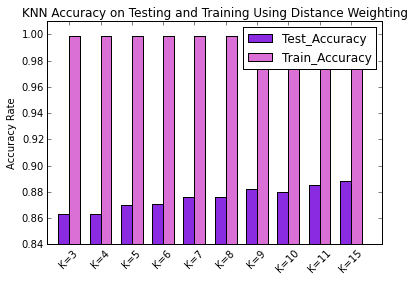

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 10
Test_Accuracy = [.863,.863,.870,.871,.876,.876,.882,.880,.885,.888]
Train_Accuracy = [.999,.999,.999,.999,.999,.999,.999,.999,.999,.999]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, Test_Accuracy, width,
                color='blueviolet',
                error_kw=dict(elinewidth=2,ecolor='blueviolet'))

rects2 = ax.bar(ind+width, Train_Accuracy, width,
                    color='orchid',
                    error_kw=dict(elinewidth=2,ecolor='orchid'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0.84,1.01)
ax.set_ylabel('Accuracy Rate')
ax.set_title('KNN Accuracy on Testing and Training Using Distance Weighting')
xTickMarks = ['K=3','K=4','K=5','K=6','K=7','K=8','K=9','K=10','K=11','K=15']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Test_Accuracy', 'Train_Accuracy') )

plt.show()

### <font color="salmon"> We can see that the best K for using the uniform weighting is at K=8, with a .895 accuracy when using the testing data and a .903 accuracy when using the training data. So it is not over-fitting or under-fitting on the training data. There is only a slight difference between the training and the testing accuracy, which is good. The K values for the distance weighting showed signs of over-fitting to the training data and the best accuracy score for the testing data was .888 at K=15. So uniform weighting at K=8 is the best for classification of this data. </font>

### <font color='lightsalmon'>Decision Tree Classifier</font>

In [81]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=35) 
# I varied the split and also tested on Gini criterion

In [82]:
treeclf = treeclf.fit(marketing_train_norm, marketing_target_train)

In [83]:
treepreds_test = treeclf.predict(marketing_test_norm)
print(treepreds_test)

['no' 'no' 'no' ..., 'yes' 'no' 'no']


In [84]:
print("Testing Accuracy", treeclf.score(marketing_test_norm, marketing_target_test))
print("Training Accuracy",treeclf.score(marketing_train_norm, marketing_target_train))

Testing Accuracy 0.887458624494
Training Accuracy 0.921000181192


In [85]:
from sklearn import cross_validation

In [86]:
cv_scores = cross_validation.cross_val_score(treeclf, training_matrix_norm, training_target, cv=5)
cv_scores

array([ 0.88,  0.89,  0.88,  0.88,  0.89])

In [87]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.89 (+/- 0.01)


### <font color='lightsalmon'> Naive Bayes Classifier</font>

In [88]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(marketing_train_norm, marketing_target_train)
nbpreds_test = nbclf.predict(marketing_test_norm)
print(nbpreds_test)

['no' 'no' 'no' ..., 'no' 'no' 'no']


In [89]:
print("Testing Accuracy", nbclf.score(marketing_test_norm, marketing_target_test))
print("Training Accuracy", nbclf.score(marketing_train_norm, marketing_target_train))

Testing Accuracy 0.701728576683
Training Accuracy 0.727668055807


In [90]:
cv_scores = cross_validation.cross_val_score(nbclf, training_matrix_norm, training_target, cv=5)
cv_scores

array([ 0.71,  0.72,  0.81,  0.82,  0.72])

In [91]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.76 (+/- 0.10)


### <font color="salmon"> Between KNN, the decision tree classifier, and the naive bayes classifier the best model to use in this instance would be the KNN classifier. Although the accuracy rate of the KNN and the Decision Tree Classifier at their optimum parameter criteria were both 89% we had to use a high number of splits in the tree which can affect efficiency time when faced with a larger dataset. There was also less difference in the accuracy scores between training and testing for the KNN model versus the decision tree model (.008 vs .044) which shows a better fit model. The least efficient model was the naive bayes classifier. </font>

### <font color='darkviolet'>Check Profit</font>

In [92]:
np.shape(marketing_test)

(2719, 65)

In [93]:
df2=pd.DataFrame(knnpreds_test,columns=['Respond_prediction'])

In [94]:
df2.head(5)

,Respond_prediction
0,no
1,no
2,no
3,yes
4,no


In [95]:
prediction_test_combined= pd.concat([marketing_test_norm,df2],axis=1)

In [96]:
prediction_test_combined.head(5)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,Respond_prediction
0,0.051282,0.615063,0.484412,1,0,0.302632,0,0,0,1,0,1,0,0,1.000000,0.981864,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no
1,0.000000,0.602510,0.698753,0,1,0.210526,0,0,0,1,0,1,0,0,0.937500,0.957153,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,no
2,0.076923,0.376569,0.882307,0,1,0.263158,1,0,0,0,0,1,0,0,1.000000,0.980503,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,no
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.0001,0,0,1,0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes
4,0.076923,0.602510,0.698753,0,1,0.289474,0,1,0,0,0,0,1,0,0.937500,0.957379,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no


In [97]:
prediction_test_combined_withID=pd.concat([prediction_test_combined,marketing_test_df["id"]],axis=1)
prediction_test_combined_withID.head(5)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,Respond_prediction,id
0,0.051282,0.615063,0.484412,1,0,0.302632,0,0,0,1,0,1,0,0,1.000000,0.981864,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no,3282
1,0.000000,0.602510,0.698753,0,1,0.210526,0,0,0,1,0,1,0,0,0.937500,0.957153,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,no,1991
2,0.076923,0.376569,0.882307,0,1,0.263158,1,0,0,0,0,1,0,0,1.000000,0.980503,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,no,5164
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.0001,0,0,1,0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,6870
4,0.076923,0.602510,0.698753,0,1,0.289474,0,1,0,0,0,0,1,0,0.937500,0.957379,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no,1329


In [98]:
profit_and_ID_only= pd.concat([training_original['profit'],training_original['id']],axis=1)

In [99]:
withprofit=prediction_test_combined_withID.merge(profit_and_ID_only, left_on='id', right_on='id', how='inner')
withprofit.head(5)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,Respond_prediction,id,profit
0,0.051282,0.615063,0.484412,1,0,0.302632,0,0,0,1,0,1,0,0,1.000000,0.981864,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no,3282,NaN
1,0.000000,0.602510,0.698753,0,1,0.210526,0,0,0,1,0,1,0,0,0.937500,0.957153,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,no,1991,NaN
2,0.076923,0.376569,0.882307,0,1,0.263158,1,0,0,0,0,1,0,0,1.000000,0.980503,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.000000,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,no,5164,NaN
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.0001,0,0,1,0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,6870,NaN
4,0.076923,0.602510,0.698753,0,1,0.289474,0,1,0,0,0,0,1,0,0.937500,0.957379,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.859735,0.00,1.000000,1.0000,0,1,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,no,1329,NaN


In [100]:
np.shape(withprofit)

(2719, 67)

### #Only look at the 'yes' response predictions ***

In [101]:
only_yes=withprofit[withprofit['Respond_prediction'] == 'yes']

In [102]:
np.shape(only_yes)

(79, 67)

In [103]:
only_profit = only_yes.drop('Respond_prediction', 1)

In [104]:
second_model = only_profit.drop('id', 1)

In [105]:
second_model.head(50)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,profit
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.000100,0,0,1,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
5,0.051282,0.054393,0.935308,1,0,0.736842,0,1,0,0,0,1,0,0,0.479167,0.082974,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.24,0.003003,0.000100,0,0,1,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN
50,0.076923,0.677824,0.603274,1,0,0.026316,0,0,0,1,0,1,0,0,0.333333,0.002267,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.170510,0.20,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,451
90,0.025641,0.811715,0.000000,1,0,0.289474,0,0,0,0,1,1,0,0,0.104167,0.055543,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.425709,0.12,0.004004,0.000133,0,0,1,0.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,185
93,0.051282,0.556485,0.778644,1,0,0.263158,0,0,1,0,0,1,0,0,0.479167,0.055543,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.16,0.022022,0.000734,0,0,1,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,199
98,0.025641,0.460251,0.722525,1,0,0.250000,0,1,0,0,0,1,0,0,0.354167,0.027205,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.105860,0.00,1.000000,1.000000,0,1,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
147,0.025641,0.556485,0.778644,1,0,0.289474,0,0,1,0,0,1,0,0,0.479167,0.055543,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.12,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,152
172,0.025641,0.054393,0.935308,1,0,0.289474,0,0,1,0,0,1,0,0,0.479167,0.088642,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.32,0.011011,0.000367,0,0,1,0.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,153
208,0.025641,0.439331,0.784879,1,0,0.289474,0,0,0,1,0,1,0,0,0.354167,0.054863,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.105860,0.08,0.016016,0.000534,0,0,1,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,122
225,0.000000,0.744770,0.199532,1,0,0.289474,0,0,0,0,1,1,0,0,0.083333,0.018363,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.226465,0.20,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,164


In [106]:
data_only_2=second_model.drop('profit',1)

In [107]:
data_only_2.head(10)

,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,custAge,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,marital_divorced,marital_married,marital_single,marital_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,nr.employed,pastEmail,pdays,pmonths,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown
3,0.000000,0.000000,1.000000,1,0,0.210526,0,0,0,0,1,1,0,0,0.479167,0.093856,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.24,0.003003,0.000100,0,0,1,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0.051282,0.054393,0.935308,1,0,0.736842,0,1,0,0,0,1,0,0,0.479167,0.082974,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.24,0.003003,0.000100,0,0,1,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
50,0.076923,0.677824,0.603274,1,0,0.026316,0,0,0,1,0,1,0,0,0.333333,0.002267,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.170510,0.20,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
90,0.025641,0.811715,0.000000,1,0,0.289474,0,0,0,0,1,1,0,0,0.104167,0.055543,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.425709,0.12,0.004004,0.000133,0,0,1,0.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93,0.051282,0.556485,0.778644,1,0,0.263158,0,0,1,0,0,1,0,0,0.479167,0.055543,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.16,0.022022,0.000734,0,0,1,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
98,0.025641,0.460251,0.722525,1,0,0.250000,0,1,0,0,0,1,0,0,0.354167,0.027205,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.105860,0.00,1.000000,1.000000,0,1,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
147,0.025641,0.556485,0.778644,1,0,0.289474,0,0,1,0,0,1,0,0,0.479167,0.055543,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.12,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
172,0.025641,0.054393,0.935308,1,0,0.289474,0,0,1,0,0,1,0,0,0.479167,0.088642,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.32,0.011011,0.000367,0,0,1,0.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
208,0.025641,0.439331,0.784879,1,0,0.289474,0,0,0,1,0,1,0,0,0.354167,0.054863,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.105860,0.08,0.016016,0.000534,0,0,1,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
225,0.000000,0.744770,0.199532,1,0,0.289474,0,0,0,0,1,1,0,0,0.083333,0.018363,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.226465,0.20,0.006006,0.000200,0,0,1,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [108]:
second_target_df = second_model["profit"]
len(second_target_df)

79

In [109]:
second_target=np.array(second_target_df)
print(second_target)

[  nan   nan  451.  185.  199.   nan  152.  153.  122.  164.   nan  106.  105.   nan  239.  172.
   nan  138.  163.  163.   nan  125.  160.  115.  169.  245.  490.   nan   nan  401.  130.   nan
  173.  209.   nan   nan  477.  180.   nan   nan   nan  210.   nan  306.   nan  226.  184.   nan
   nan  233.   nan  182.  194.  156.  218.   nan   nan  244.  149.   nan  149.   nan  123.  128.
  -27.  213.  172.  179.  230.  507.   nan   nan   nan   nan  120.   nan  177.  179.   nan]


In [110]:
trainingdata2=np.array(data_only_2)
trainingdata_names2 = data_only_2.columns
print(trainingdata_names2)
training_dict2 = [dict(zip(trainingdata_names2,record)) for record in trainingdata2]
training_dict2[:1]
training_vec2 = DictVectorizer()
training_matrix2 = training_vec2.fit_transform(training_dict2).toarray()
training_vec2.get_feature_names()
np.set_printoptions(precision=2, linewidth=100, suppress=True)
print(training_matrix2[0:3])
len(training_matrix2)

Index(['campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_cellular', 'contact_telephone', 'custAge', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes', 'emp.var.rate', 'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'nr.employed', 'pastEmail', 'pdays', 'pmonths', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'previous', 'profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'schooling_basi

79

In [111]:
def knn_search(user_id,instance, data, K, measure, classes):
    """ find K nearest neighbours of data point x among D """
    knn_imputation = []
    if np.isfinite(classes[user_id]):
        adjusted_mean = classes[user_id]
    else:
        if measure == 0:
            # euclidean distances from the other points
            dists = np.array([np.sqrt(((data[i] - instance)**2).sum(axis=0)) for i in range(len(data))])
        elif measure == 1:
            # using the cosine similarity measure
            D_norm = np.array([np.linalg.norm(data[i]) for i in range(len(data))])
            x_norm = np.linalg.norm(instance)
            sims = np.dot(data,instance)/(D_norm * x_norm)
            dists = 1 - sims
        idx = np.argsort(dists) # sorting

        numerators = []
        denominators = []
        for index in idx[:K]:
            if np.isnan(classes[index]):
                continue
            else:
                #Adjusted Mean: 
                numerators.append(classes[index]*dists[index])
                denominators.append(dists[index])
        adjusted_mean= sum(numerators)/sum(denominators)
    
    # return the indexes of K nearest neighbors
    #sorted(dists)[:K]
    return adjusted_mean

In [112]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
knn_imputation = []
for user_id,user in enumerate(training_matrix2):
    adjusted_mean = knn_search(user_id,training_matrix2[user_id],training_matrix2, 7, 1, second_target)
    knn_imputation.append(adjusted_mean)
    print(adjusted_mean)

173.756830397
248.335238861
451.0
185.0
199.0
205.118780875
152.0
153.0
122.0
164.0
177.370151685
106.0
105.0
177.618539288
239.0
172.0
143.863535491
138.0
163.0
163.0
178.035160811
125.0
160.0
115.0
169.0
245.0
490.0
151.657096782
150.085827167
401.0
130.0
233.18117803
173.0
209.0
164.042438852
193.247637218
477.0
180.0
157.626317581
148.823185509
203.935099589
210.0
173.031562624
306.0
196.403316582
226.0
184.0
197.701969375
221.338434779
233.0
141.348228577
182.0
194.0
156.0
218.0
169.307745712
180.914435735
244.0
149.0
169.490986624
149.0
186.014012422
123.0
128.0
-27.0
213.0
172.0
179.0
230.0
507.0
173.621352494
241.591331492
245.0
291.211365692
120.0
203.353185069
177.0
179.0
283.250318845


In [113]:
profit_filled_target=np.array(knn_imputation)
print(profit_filled_target)

[ 173.76  248.34  451.    185.    199.    205.12  152.    153.    122.    164.    177.37  106.    105.
  177.62  239.    172.    143.86  138.    163.    163.    178.04  125.    160.    115.    169.    245.
  490.    151.66  150.09  401.    130.    233.18  173.    209.    164.04  193.25  477.    180.
  157.63  148.82  203.94  210.    173.03  306.    196.4   226.    184.    197.7   221.34  233.
  141.35  182.    194.    156.    218.    169.31  180.91  244.    149.    169.49  149.    186.01
  123.    128.    -27.    213.    172.    179.    230.    507.    173.62  241.59  245.    291.21
  120.    203.35  177.    179.    283.25]


In [114]:
print(second_target)

[  nan   nan  451.  185.  199.   nan  152.  153.  122.  164.   nan  106.  105.   nan  239.  172.
   nan  138.  163.  163.   nan  125.  160.  115.  169.  245.  490.   nan   nan  401.  130.   nan
  173.  209.   nan   nan  477.  180.   nan   nan   nan  210.   nan  306.   nan  226.  184.   nan
   nan  233.   nan  182.  194.  156.  218.   nan   nan  244.  149.   nan  149.   nan  123.  128.
  -27.  213.  172.  179.  230.  507.   nan   nan   nan   nan  120.   nan  177.  179.   nan]


In [115]:
len(training_matrix2)

79

In [116]:
from sklearn.cross_validation import train_test_split
marketing_train2, marketing_test2, marketing_target_train2, marketing_target_test2 = train_test_split(training_matrix2, profit_filled_target, test_size=0.1, random_state=33)

print(marketing_train2.shape, marketing_test2.shape)
print(marketing_test2[0:5])

(71, 64) (8, 64)
[[ 0.05  0.81  0.    1.    0.    0.29  0.    0.    1.    0.    0.    1.    0.    0.    0.1   0.04
   1.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.    0.    0.
   0.    0.    0.    0.43  0.16  0.02  0.    0.    0.    1.    0.17  1.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.68  0.6   1.    0.    0.29  0.    0.    0.    1.    0.    1.    0.    0.    0.33  0.    1.
   0.    0.    1.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.17  0.12  0.01  0.    0.    0.    1.    0.17  1.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.03  0.56  0.78  1.    0.    0.29  0.    0.    1.    0.    0.    1.    0.    0.    0.48  0.06
   0.    0.    1.    1.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  

### <font color='lightsalmon'>Random Forest for Profit</font>

In [117]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor(n_estimators = 100)

forest = forest.fit(marketing_train2,marketing_target_train2)

In [118]:
# Take the same decision trees and run it on the test data
predicted = forest.predict(marketing_test2)
predicted

array([ 177.72,  174.03,  157.73,  180.49,  187.37,  423.97,  205.92,  193.99])

In [119]:
print("Testing Accuracy", forest.score(marketing_test2, marketing_target_test2))
print("Training Accuracy",forest.score(marketing_train2, marketing_target_train2))

Testing Accuracy 0.957232911085
Training Accuracy 0.910795064512


### NOW ON THE ACTUAL TESTING DATA

In [120]:
all_testing_data.head(5)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,40,2,999,1,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,35,2,3,1,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,50,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,30,1,999,0,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,39,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [121]:
dropped_id_testing=all_testing_data.drop('id', axis=1)

In [122]:
testing_original_data=np.array(dropped_id_testing)

In [123]:
testingdata_names = all_testing_data.columns
print(trainingdata_names)

Index(['campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_cellular', 'contact_telephone', 'custAge', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes', 'emp.var.rate', 'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'nr.employed', 'pastEmail', 'pdays', 'pmonths', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'previous', 'profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'schooling_basi

In [124]:
testing_dict = [dict(zip(testingdata_names,record)) for record in testing_original_data]

In [125]:
testing_vec = DictVectorizer()
testing_original_matrix = testing_vec.fit_transform(testing_dict).toarray()

In [126]:
testing_vec.get_feature_names()

['campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'contact_cellular',
 'contact_telephone',
 'custAge',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'default_no',
 'default_unknown',
 'default_yes',
 'emp.var.rate',
 'euribor3m',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'nr.employed',
 'pastEmail',
 'pdays',
 'pmonths',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous',
 'profession_admin.',
 'profession_blue-collar',
 'profession_entrepreneur',
 'profession_housemaid',
 'profession_management',
 'profession_retired',
 'profession_self-employed',
 'profession_services',
 'profession_student',
 'profession_technician',
 'profession_un

In [127]:
min_max_scaler = preprocessing.MinMaxScaler().fit(testing_original_matrix)

In [128]:
testing_original_norm = min_max_scaler.transform(testing_original_matrix)

### Running the KNN classifier to subset by responses which are classified as 'yes'

In [155]:
all_testing_data.head(5)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,40,2,999,1,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,35,2,3,1,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,50,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,30,1,999,0,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,39,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [156]:
testing_original_norm

array([[ 0.02,  0.56,  0.78, ...,  0.  ,  1.  ,  0.  ],
       [ 0.02,  0.88,  0.07, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.19,  0.27, ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.02,  0.19,  0.27, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.38,  0.88, ...,  0.  ,  0.  ,  0.  ],
       [ 0.02,  0.42,  0.3 , ...,  0.  ,  1.  ,  0.  ]])

In [129]:
knn_test_original = knnclf.predict(testing_original_norm)

In [130]:
knn_test_original

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [131]:
response_testing_out=pd.DataFrame(knn_test_original,columns=['response_prediction_testing'])

In [133]:
# only_yes_predictions = responses.loc[responses['response_prediction_testing'] == 'yes']

In [135]:
# print(np.shape(only_yes_predictions))

(989, 23)


In [184]:
test_orig_dropid=all_testing_data.drop('id', axis=1)
testingdata_names=test_orig_dropid.columns
testingdata_names

Index(['profession_admin.', 'profession_blue-collar', 'profession_entrepreneur', 'profession_housemaid', 'profession_management', 'profession_retired', 'profession_self-employed', 'profession_services', 'profession_student', 'profession_technician', 'profession_unemployed', 'profession_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'schooling_basic.4y', 'schooling_basic.6y', 'schooling_basic.9y', 'schooling_high.school', 'schooling_illiterate', 'schooling_professional.course', 'schooling_university.degree', 'schooling_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutc

In [185]:
np.shape(testing_original_norm)

(32950, 64)

In [186]:
marketing_test_df2=pd.DataFrame(testing_original_norm,columns=testingdata_names)
marketing_test_df2.head(5)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0.018182,0.556485,0.778644,1,0,0.283951,0,0,0,0,1,1,0,0,0.479167,0.057130,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.071429,1.000000,1.0000,1,0,0,0.142857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.018182,0.878661,0.069369,1,0,0.222222,0,0,0,1,0,1,0,0,0.000000,0.034913,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.203781,0.071429,0.003003,0.0001,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.192469,0.269680,1,0,0.407407,0,0,1,0,0,0,1,0,0.333333,0.157107,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.512287,0.071429,1.000000,1.0000,1,0,0,0.142857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.615063,0.484412,1,0,0.160494,0,0,0,0,1,1,0,0,1.000000,0.981637,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.000000,0.000000,1.000000,1.0000,0,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.368201,0.389322,1,0,0.271605,0,0,0,1,0,1,0,0,0.687500,0.797778,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.877883,0.000000,1.000000,1.0000,0,1,0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [161]:
np.shape(marketing_test_df2)

(32950, 64)

In [162]:
responses= pd.concat([marketing_test_df2,response_testing_out],axis=1)

In [164]:
only_yes_predictions = responses.loc[responses['response_prediction_testing'] == 'yes']
np.shape(only_yes_predictions)

(989, 65)

In [166]:
only_yes_predictions.head(10)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,response_prediction_testing
1,0.018182,0.878661,0.069369,1,0,0.222222,0,0,0,1,0,1,0,0,0.000000,0.034913,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.203781,0.071429,0.003003,0.000100,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,yes
32,0.000000,0.154812,0.340608,1,0,0.283951,0,0,0,0,1,1,0,0,0.333333,0.174790,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.512287,0.000000,1.000000,1.000000,0,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,yes
135,0.000000,0.744770,0.199532,1,0,0.358025,0,1,0,0,0,0,1,0,0.083333,0.016323,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.226465,0.035714,0.006006,0.000200,0,0,1,0.142857,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,yes
147,0.000000,0.451883,0.652767,1,0,0.654321,0,0,1,0,0,1,0,0,0.333333,0.011109,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.170510,0.000000,0.003003,0.000100,0,0,1,0.285714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes
152,0.000000,1.000000,0.089634,1,0,0.345679,0,0,0,1,0,1,0,0,0.000000,0.024938,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.203781,0.000000,1.000000,1.000000,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,yes
172,0.000000,0.418410,0.296960,1,0,0.358025,0,0,1,0,0,1,0,0,0.104167,0.142371,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.425709,0.000000,1.000000,1.000000,0,1,0,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,yes
225,0.000000,0.154812,0.340608,1,0,0.419753,0,0,1,0,0,1,0,0,0.333333,0.165722,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.512287,0.000000,0.002002,0.000067,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,yes
270,0.018182,0.460251,0.722525,1,0,0.148148,0,0,0,1,0,1,0,0,0.354167,0.020177,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.105860,0.035714,0.013013,0.000434,0,0,1,0.142857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,yes
326,0.000000,1.000000,0.089634,0,1,0.308642,0,0,0,1,0,1,0,0,0.000000,0.021310,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.203781,0.071429,0.003003,0.000100,0,0,1,0.142857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes
389,0.036364,0.000000,1.000000,1,0,0.518519,0,0,1,0,0,1,0,0,0.479167,0.094310,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.142857,0.003003,0.000100,0,0,1,0.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,yes


### Need to get ID's back

In [193]:
only_yes_with_id = pd.concat([only_yes_predictions,all_testing_data["id"]],axis=1)
only_yes_with_id.head(10)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,response_prediction_testing,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.018182,0.878661,0.069369,1,0,0.222222,0,0,0,1,0,1,0,0,0,0.034913,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.203781,0.071429,0.003003,0.0001,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,yes,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [195]:
only_yesID = only_yes_with_id.dropna(subset = ['response_prediction_testing']) 

In [196]:
only_yesID.head(5)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,response_prediction_testing,id
1,0.018182,0.878661,0.069369,1,0,0.222222,0,0,0,1,0,1,0,0,0.000000,0.034913,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.203781,0.071429,0.003003,0.0001,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,yes,2
32,0.000000,0.154812,0.340608,1,0,0.283951,0,0,0,0,1,1,0,0,0.333333,0.174790,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.512287,0.000000,1.000000,1.0000,0,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,yes,33
135,0.000000,0.744770,0.199532,1,0,0.358025,0,1,0,0,0,0,1,0,0.083333,0.016323,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.226465,0.035714,0.006006,0.0002,0,0,1,0.142857,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,yes,136
147,0.000000,0.451883,0.652767,1,0,0.654321,0,0,1,0,0,1,0,0,0.333333,0.011109,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.170510,0.000000,0.003003,0.0001,0,0,1,0.285714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,148
152,0.000000,1.000000,0.089634,1,0,0.345679,0,0,0,1,0,1,0,0,0.000000,0.024938,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.203781,0.000000,1.000000,1.0000,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,yes,153


In [197]:
np.shape(only_yesID)

(989, 66)

In [229]:
yes_id=pd.DataFrame(only_yesID['id'])
yes_list=list(yes_id['id'])

### Running the Random forest regressor to subset by people spending more than $30

In [167]:
removed_responses = only_yes_predictions.drop('response_prediction_testing', axis=1)

In [177]:
np.shape(removed_responses)

(989, 64)

In [174]:
removed_responses.head(5)

,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
1,0.018182,0.878661,0.069369,1,0,0.222222,0,0,0,1,0,1,0,0,0.000000,0.034913,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.203781,0.071429,0.003003,0.0001,0,0,1,0.142857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
32,0.000000,0.154812,0.340608,1,0,0.283951,0,0,0,0,1,1,0,0,0.333333,0.174790,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.512287,0.000000,1.000000,1.0000,0,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
135,0.000000,0.744770,0.199532,1,0,0.358025,0,1,0,0,0,0,1,0,0.083333,0.016323,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.226465,0.035714,0.006006,0.0002,0,0,1,0.142857,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
147,0.000000,0.451883,0.652767,1,0,0.654321,0,0,1,0,0,1,0,0,0.333333,0.011109,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.170510,0.000000,0.003003,0.0001,0,0,1,0.285714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152,0.000000,1.000000,0.089634,1,0,0.345679,0,0,0,1,0,1,0,0,0.000000,0.024938,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.203781,0.000000,1.000000,1.0000,0,1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [168]:
forest_test_original = forest.predict(removed_responses)

In [169]:
forest_test_original

array([ 205.93,  190.77,   62.34,  236.86,  200.4 ,  178.64,  193.16,  171.07,  189.66,  186.35,
        224.76,  208.15,  164.33,  142.57,   92.39,  191.38,  221.49,  163.32,  184.19,  202.58,
        114.81,  174.81,  227.22,  190.51,  159.55,  155.23,  172.82,  193.76,  193.28,  193.5 ,
        163.16,  176.7 ,  184.09,  166.26,  209.7 ,  218.85,  367.57,  194.49,  160.09,  140.21,
        187.17,  183.14,  153.  ,  416.94,  437.32,  169.48,  400.21,  165.55,  200.76,  195.02,
        163.66,  240.33,  203.78,  153.78,  193.4 ,  164.48,  249.28,  216.22,  144.44,  114.21,
        191.91,  146.02,  197.07,  202.3 ,  192.45,  188.54,  204.17,  170.25,  201.34,  186.83,
        409.26,  377.09,  188.71,  146.08,  186.04,  177.84,  149.53,  428.57,  200.18,  145.4 ,
        202.62,  165.81,  188.43,   97.75,  206.8 ,  194.33,  197.45,  156.01,  210.49,  408.5 ,
        429.97,  230.75,  418.22,  184.14,  409.24,  174.67,  172.73,  159.04,  180.66,  183.86,
        158.92,  372.61,  242.

In [234]:
df_testing_out=pd.DataFrame(forest_test_original,columns=['profit_prediction_testing'])
df_testing_out.head(5)

,profit_prediction_testing
0,205.929979
1,190.768219
2,62.339831
3,236.856799
4,200.402471


In [233]:
np.shape(df_testing_out)

(989, 1)

In [219]:
np.shape(only_yesID['id'])

(989,)

In [221]:
predictionprofit_test_combinedwithID= pd.concat([df_testing_out,yes_id],axis=1,ignore_index=True)

In [241]:
profit_list=list(df_testing_out['profit_prediction_testing'])

In [242]:
zipped=zip(yes_list,profit_list)

In [243]:
list(zipped)

[(2, 205.92997948610417),
 (33, 190.76821936449119),
 (136, 62.339830649024286),
 (148, 236.85679854032423),
 (153, 200.40247135216475),
 (173, 178.64312982337708),
 (226, 193.16179468336281),
 (271, 171.07185337710391),
 (327, 189.6568207968846),
 (390, 186.34779787937126),
 (425, 224.76353309744084),
 (453, 208.14905285620668),
 (511, 164.32717125614417),
 (532, 142.56637756415836),
 (536, 92.385489383182232),
 (551, 191.37584492254661),
 (620, 221.49318270045734),
 (651, 163.31936804205822),
 (661, 184.18602845405846),
 (684, 202.57548845893365),
 (736, 114.81457802978998),
 (769, 174.80930797425404),
 (784, 227.22391600182081),
 (787, 190.50745707654204),
 (796, 159.55471420534417),
 (824, 155.22984123066297),
 (894, 172.82124108073384),
 (916, 193.76138808621965),
 (940, 193.28249016712414),
 (994, 193.49521041560823),
 (1075, 163.15741079784991),
 (1114, 176.70243086785814),
 (1128, 184.09034537458857),
 (1182, 166.26026995166879),
 (1183, 209.69976949602162),
 (1228, 218.8517461

In [248]:
DataSet = pd.DataFrame(list(zip(yes_list,profit_list)))
DataSet.head(5)

,0,1
0,2,205.929979
1,33,190.768219
2,136,62.339831
3,148,236.856799
4,153,200.402471


In [249]:
DataSet.columns = ['id','profit_prediction_testing']

In [250]:
DataSet.head(5)

,id,profit_prediction_testing
0,2,205.929979
1,33,190.768219
2,136,62.339831
3,148,236.856799
4,153,200.402471


In [251]:
np.shape(DataSet)

(989, 2)

In [252]:
greater_than=DataSet[DataSet['profit_prediction_testing'] > 30]

In [253]:
np.shape(greater_than)

(989, 2)

In [254]:
greater_than['Should_We_Target'] = 'yes'

In [255]:
greater_than.head(5)

,id,profit_prediction_testing,Should_We_Target
0,2,205.929979,yes
1,33,190.768219,yes
2,136,62.339831,yes
3,148,236.856799,yes
4,153,200.402471,yes


### Sum profit

In [274]:
summed = greater_than['profit_prediction_testing'].sum(axis=1)
summed

209528.97789006081

In [257]:
withprofit=testing_original.merge(greater_than, left_on='id', right_on='id', how='outer')
np.shape(withprofit)

(32950, 24)

In [258]:
withprofit.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,profit_prediction_testing,Should_We_Target
0,40,admin.,married,university.degree,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1,NaN,NaN
1,35,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2,205.929979,yes
2,50,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3,NaN,NaN
3,30,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4,NaN,NaN
4,39,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5,NaN,NaN
5,40,student,single,university.degree,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,999.0,0,6,NaN,NaN
6,36,housemaid,married,basic.4y,no,yes,no,cellular,apr,thu,7,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,999.0,0,7,NaN,NaN
7,30,admin.,single,basic.9y,no,yes,no,telephone,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0,8,NaN,NaN
8,40,blue-collar,single,university.degree,no,yes,no,telephone,may,wed,10,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,9,NaN,NaN
9,40,self-employed,married,university.degree,no,no,no,cellular,aug,fri,7,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,999.0,0,10,NaN,NaN


In [264]:
withprofit['Should_We_Target'].fillna('no', inplace=True)

In [265]:
withprofit.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,profit_prediction_testing,Should_We_Target
0,40,admin.,married,university.degree,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1,NaN,no
1,35,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2,205.929979,yes
2,50,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3,NaN,no
3,30,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4,NaN,no
4,39,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5,NaN,no
5,40,student,single,university.degree,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,999.0,0,6,NaN,no
6,36,housemaid,married,basic.4y,no,yes,no,cellular,apr,thu,7,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,999.0,0,7,NaN,no
7,30,admin.,single,basic.9y,no,yes,no,telephone,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0,8,NaN,no
8,40,blue-collar,single,university.degree,no,yes,no,telephone,may,wed,10,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,9,NaN,no
9,40,self-employed,married,university.degree,no,no,no,cellular,aug,fri,7,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,999.0,0,10,NaN,no


In [267]:
output=withprofit.drop('profit_prediction_testing', axis=1)

In [268]:
output.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,Should_We_Target
0,40,admin.,married,university.degree,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1,no
1,35,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2,yes
2,50,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3,no
3,30,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4,no
4,39,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5,no


In [269]:
output.to_csv('output4.csv',sep=",",index=True)

In [543]:
data1 = pd.read_csv("output.csv",na_values=["?"]) #Reading the dataset in a dataframe using Pandasg

C:\Anaconda34\lib\site-packages\pandas\io\parsers.py:1139: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
